# Programming for Data Analysis - Project December 2018

## Project Instructions:
For this project you must create a data set by simulating a real-world phenomenon of your choosing. You may pick any phenomenon you wish – you might pick one that is of interest to you in your personal or professional life. Then, rather than collect data related to the phenomenon, you should model and synthesise such data using Python. We suggest you use the numpy.random package for this purpose

Choose a real-world phenomenon that can be measured and for which you could collect at least one-hundred data points across at least four different variables.

    Investigate the types of variables involved, their likely distributions, and their relationships with each other.
    Synthesise/simulate a data set as closely matching their properties as possible.
    Detail your research and implement the simulation in a Jupyter notebook – the data set itself can simply be displayed in an output cell within the notebook.

Note that this project is about simulation – you must synthesise a data set. Some students may already have some real-world data sets in their own files. It is okay to base your synthesised data set on these should you wish (please reference it if you do), but the main task in this project is to create a synthesised data set. The next section gives an example project idea.


## Project implementation and output

This project aims to use python and in particular the numpy.random library to model the distribution of final grades achieved by full-time Honours Degree students studying in Irish Higher Education institutions.

This project utilised introductory programming skills developed in Semester 1 of the Higher Diploma in Data Analytics, while adding skills and knowledge gained in Semester II, in particular the use of probalility distributions. In addition, the project allowed for the expansion to my programming knowledge to take in reading data from Excel workbooks into a dataframe, modifying the data (deleting columns, replacing values etc) and saving pandas dataframes as .csv files. A big limitation of this project was my lack of prior knowledge of or experience in utilizing probability distributions, so this project has greatly enhanced my capabilities in this area (albeit from a low base!)

This project is divided into three sections:


## [Part 1 - Cleaning and Editing a real-world datasaet](https://github.com/davesheils/ProgDA_Project/blob/master/Programming%20for%20Data%20Analysis%20-%20Part%201%20-%20Data%20Preparation.ipynb)

This first notebook is what is left of the rough work for the first stage of the project. Much of the code has been commented out and the original data to which it refers was never part of this repository.

The source dataset used for this report is real-life data on grades obtained by Honours Degree graduates from publicly funded institutions in Ireland in 2017 (i.e those students whose final year of study was academic year 2017-18).

The original data contained (name of database field in brackets):
* Student ID (Student id)
* Gender (Gender Long)
* Type of Award (Non Standard Award Desc), filtered by Honours Degree
* Institute Type (University, Institue of Technology, or Collge, i.e. other publicly funded college)
* Name of College (Institute)
* Field of Study (Isced Broad Desc)
* Grade achieved (Grade Desc)


This datasert was crossreferenced wih data on New Entrants to the same institutions in 2012 and 2013  (for students taking degrees over either three or four year periods). The New Entrants data set had the following fields:

* Student id
* Academic Year (2012/13 or 2014/15)
* Gender (Gender Long)
* Leaving certificate points range - numerical (LC Points Range 1)
* Leaving certificate points range - low/medium/high (LC Points Range 2)
* Type of School attended (DEIS_OR_FEE_PAYING_DESC)
* High Qual Desc
* Age Group
* Institute
* Institute Type
* Progtype Desc
* Isced Broad Desc


Using the excel VLOOKUP feature a single dataset was created with the following fields:

* Unique Student identifier with studentID and institute short name (ALT Student id)
* Year of Entry
* Gender Long
* LC Points Range 1
* LC Points Range 2
* DEIS_OR_FEE_PAYING_DESC
* High Qual Desc
* Age Group
* Institute
* Institute Type
* Progtype Desc
* Year of Graduation
* Non Standard Award Desc
* Field of Study
* Grade Desc
* Score
* Number of years
* renamed institution (Institute Alternative Name) 


This working was done onsite in the offices of the Higher Education Authority. The source data is not saved as part of this reproitory. Therefore if the first section of this notebook is re-run, a file-not-found error will be generated:

No such file or directory: 'Graduates2017 - Excel.xlsx'

Please note that no attempt was made to look at the students socio-economic or ethnic-cultural background, nor whether or not the student had/has a disability. 


At this stage we had 20643 graduate records from 2017 that could be matched with characteristics captured at point of entry in 2012 or 2013.

In addition, a column was replaced to add mean score per grade to each student - thes reason for this will become clearer in section 2 (This workging was actully done by taking a break from python and paying a quick return to excel.


An eyeballing of the data revealed some duplicates. The excel data was reloaded into pandas and these duplicates were removed by sorting the data by student ID and year(df.sort_values(['ALT Student id', 'Year of Entry']) and then by dropping the duplicates (f = df.drop_duplicates(subset='ALT Student id', keep='last', inplace=False)).

Now, we are satisfied that each observation represents a unique student who entered in 2012 or 2013 and who graduated in 2017, so we can drop the student ID and the institue name, along with the Programme type Description on entry:
df = df.drop(columns=['ALT Student id', 'Institute', 'Progtype Desc'])

Finally, we want to remove two non-standard class of honours degree from the analysis:

df = df[df['Grade Desc'] != 'Other Honours'] # remove "other honours" - unclear how to treat 
df = df[df['Grade Desc'] != '2nd Class Honours'] # remove undifferentiated second class honours.

As we are satisifed that the data has been sufficiently anonymised, the data can be saved as a csv file:

df.to_csv('GraduateSampleNua2017.csv')


## [Part 2 - Analysis of this dataset](https://github.com/davesheils/ProgDA_Project/blob/master/Programming%20for%20Data%20Analysis%20-%20%20Part%202%20-%20Analysis.ipynb)

The second part of the project was the analyis of this data to see if, on a meta level did the dataset conform to one of the more common probability districutions (the normal distribution been the most obvious). 

In addition, a number of subsets of the data were similarly analyised to see whether or not the distribution obscured any variation in any of its subsets.

Therefore the data as a whole was analysed, but also seperate analyses were conducted on by:

* Gender 
* Type of school attended by the student (DEIS, Fee-paying, Other or Unknown)
* Type of instition from which the student graduated (University, College or Institute of Technology)
* Leaving Cert Points attained (high, medium and low ranges)
* Field of Study


The [notebook](https://github.com/davesheils/ProgDA_Project/blob/master/Programming%20for%20Data%20Analysis%20-%20%20Part%202%20-%20Analysis.ipynb) contains the workings and the results for each of these analysis. Please note, that is re-run, the code will output a PDF of each of the sub anlysis.

The workings for the first part of this analysis is repeated in the following section of this notebook.

In [227]:
# First step - import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Second step - load data from CSV

df2 = pd.read_csv('GraduateSampleNua2017.csv')
df2.head()

,Unnamed: 0,Year of Entry,Gender Long,LC Points Range 1,LC Points Range 2,DEIS_OR_FEE_PAYING_DESC,High Qual Desc,Age Group,Institute Type,Year of Graduation,Non Standard Award Desc,Field of Study,Grade Desc,Score,Number of years,Institute Alternative Name
0,0,2012/2013,Female,305 to <355,medium points,Neither,NaN,19,Colleges,2017,Undergraduate Honours Degree,Arts and humanities,2nd Class Honours (Grade 2),54.5,4,College 5
1,1,2012/2013,Female,305 to <355,medium points,Neither,NaN,18,Colleges,2017,Undergraduate Honours Degree,Arts and humanities,2nd Class Honours (Grade 2),54.5,4,College 5
2,2,2012/2013,Female,405 to <455,high points,Neither,NaN,19,Colleges,2017,Undergraduate Honours Degree,Arts and humanities,1st Class Honours,85.0,4,College 5
3,3,2012/2013,Male,455 to <505,high points,Neither,NaN,19,Colleges,2017,Undergraduate Honours Degree,Arts and humanities,2nd Class Honours (Grade 2),54.5,4,College 5
4,4,2012/2013,Female,205 to <255,medium points,Neither,NaN,22,Colleges,2017,Undergraduate Honours Degree,Arts and humanities,3rd Class Honours,44.5,4,College 5


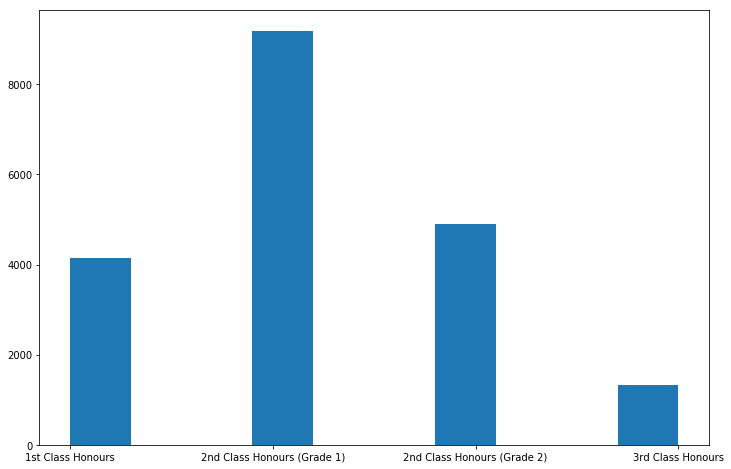

In [228]:
# what is the overall distribution of grades of this dataset?
# Please remember that we do not have actual scores, only grades, 
# replaced with the median score of the grade (e.g 85 for a first etc)

plt.figure(figsize=(12, 8))
plt.hist(df2['Grade Desc'])
plt.show()

In [229]:
# Would it be accurate to describe this as a normal distribution?

# What is the standard deviation of the grade Desc column?

df2.describe()

,Unnamed: 0,Year of Graduation,Score,Number of years
count,19581.000000,19581.0,19581.000000,19581.000000
mean,10029.585261,2017.0,64.980389,3.145907
std,5827.946811,0.0,11.884014,0.353022
min,0.000000,2017.0,44.500000,3.000000
25%,5005.000000,2017.0,54.500000,3.000000
50%,9930.000000,2017.0,64.500000,3.000000
75%,14946.000000,2017.0,64.500000,3.000000
max,20642.000000,2017.0,85.000000,4.000000


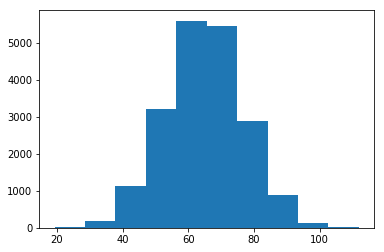

In [230]:
# So  .... lets try to recreate the above by using numpy.random.normal, using the count, mean and std deviation, as derived
# from the above 

# To recap, The numpy.random.normal() function draws random samples from a normal (Gaussian) distribution.

# The function takes 3 values:

 
#   loc: the mean or "centre" of the distribution
#   scale: the standard deviation of the distribution
#   size: the number of samples

x = np.random.normal(64.980389, 11.884014, 19581)
plt.hist(x)
plt.show()


Clearly, a normal distribution is an inappropriate model here.

** OR IS IT? **

Revisited 13/12/2018

why dont' we group the randomly generated scores into grades and them plot ... and play with the parameters to see if we can (admittedlty through trial and error rather than strict scientific method, roughly replicate the overall distribution of grades.

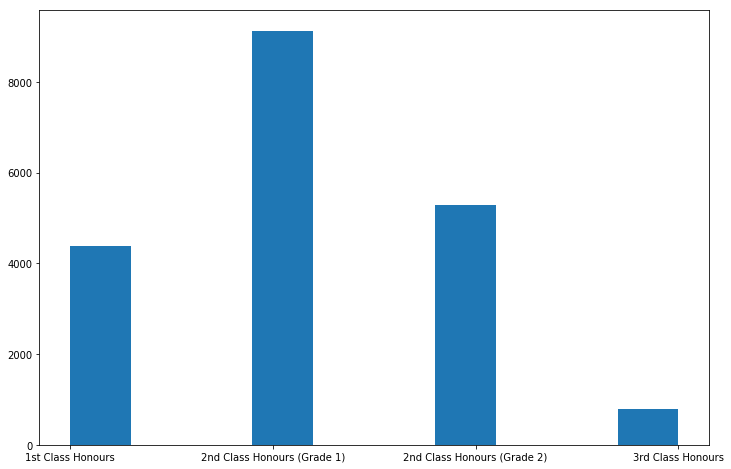

In [231]:
# (1) Function 'grade' to allocate grade based on score

def grade(x):
    if x > 69:
        return '1st Class Honours'
    elif x > 59:
        return '2nd Class Honours (Grade 1)'
    elif x > 49:
        return '2nd Class Honours (Grade 2)'
    else:
        return '3rd Class Honours'

# (2) Generate numpy array random examination scores 
    
scores = np.random.normal(63, 8, 19581) # lets play with the paramenters -unfortunately as we do not have a set of actual scores
# the mean and the standard deviation will not be exact, so a bit of trial and error may be required to make the distribution fit


# (3) Using list comprehension, create a new array by calling the grade function to assign a grade to each member of the
# scores array
grades = [grade(x) for x in scores]

# (4) plot a histogram showing the distribution of grades from the randomly generated numbers

plt.figure(figsize=(12, 8))
plt.hist(grades)
plt.show()

Further analyses of the subgroups (gender, field of study etc) were conducted and it was felt that the above pattern was broadly replicated across subgroups. There were some variations - for example, those with medium and low LC points were more likely to get a third than a first. By contrst, students who graduated from Hons Degrees in Computing seem more likely to achieve a first.

Both these groups represent only small subsets of the data available, so at least for thepurposes of this analysis, there is no reason to view the variations as making an impact of the distribution of grades as a whole.

## Part 3 - [Simulation of this dataset](https://github.com/davesheils/ProgDA_Project/blob/master/Programming%20for%20Data%20Analysis%20-%20Part%203%20-%20Simulation.ipynb)


Following from the workings in the previous sections, in final section we will simulate the distribution of grades for a cohort of Irish Higher Education Graduates (Full-time honours degree only)

The method will be as follows:

(1) generate a randomly generated sequence based on a Normal Distribution. This sequence will take a mean of 63 and a Standard Deviation of 8 to start with (see analysis above).  

(2) for each value we will assign a grade, based on it falling into the following:

1st Class Honours 70 - 100
2nd Class Honours (Grade 1) 60 - 69
2nd Class Honours (Grade 2) 50 - 59
3rd Class Honours 40 - 49

in practice, all scores > 69 will be classed as a first, likewise all scores below 49 will be classed as a 3rd Class Honours Degree

This will be done by re-using the grade function defined in part 2.

(3) We will plot the distribution of these grades as a histogram

(4) Finally, we will present the distribution of grades as percentages


In [232]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#  function to simulate distribution of grades for an entimated number of graduates

def GradesDistribution(MeanScore, stddev, students):
    # Simulate distribution of grades, assuming a mean final score of 63 and a standard deviation of 8
    # x = number of graduates
    scores = np.random.normal(MeanScore, stddev, students)
    # Using list comprehension, create a new array by 
    # calling the grade function to assign a grade to each member of the
    # scores array
    grades = ([grade(y) for y in scores]) # create a list of grades as a list, reusing the grade function from section 2
    grades = np.asarray(grades) # convert list to numpy array
    return grades

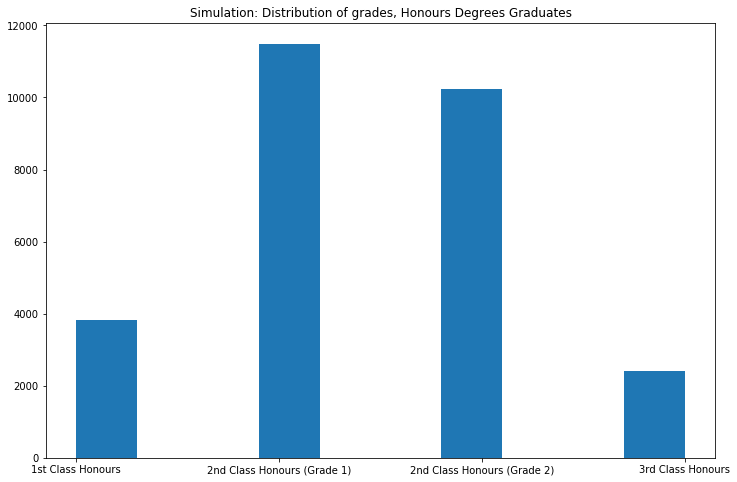

Distribution of grades:
Number of first class honours:  6,386 ( 23% )
Number of 2nd Class Honours (Grade 1) 13,026 ( 47% )
Number of 2nd Class Honours (Grade 2) 7,443 ( 27% )
Number of Third Class Honours 1,106 ( 4% )
Total number of awards:  27,961


In [256]:
# Now set variables

students = 27961
stddev = 8
AverageScore = 63

data = GradesDistribution(AverageScore, stddev, students)

data

plt.figure(figsize=(12, 8))
plt.hist(GradesDistribution(MeanScore, stddev, students))
plt.title('Simulation: Distribution of grades, Honours Degrees Graduates')
plt.show()


third = np.count_nonzero(data == '3rd Class Honours')
Two2 = np.count_nonzero(data == '2nd Class Honours (Grade 2)')
Two1 = np.count_nonzero(data == '2nd Class Honours (Grade 1)')
first  = np.count_nonzero(data == '1st Class Honours')



print("Distribution of grades:")
print( "Number of first class honours: ", "{:,}".format(first), "(","{0:.0f}%".format(first/students * 100),")")
print("Number of 2nd Class Honours (Grade 1)", "{:,}".format(Two1),"(","{0:.0f}%".format(Two1/students * 100),")")
print("Number of 2nd Class Honours (Grade 2)", "{:,}".format(Two2) ,"(","{0:.0f}%".format(Two2/students * 100),")")
print("Number of Third Class Honours", "{:,}".format(third) ,"(","{0:.0f}%".format(third/students * 100),")")
print("Total number of awards: ", "{:,}".format(first + Two1 + Two2 + third))


Evaluation of results:

The following is the actual distribution of grades of 27,961 Hons Degree students 2017.

Row Labels	Sum of Number of Students		
* 1st Class Honours	- 	20%
* 2nd Class Honours (Grade 1)	-	50%
* 2nd Class Honours (Grade 2)	-		28%
* 3rd Class Honours	- 3%



As can be seen, the simulation (on a number of runs - please try it!) slightly overestimates the proportion of firsts and thirds, and underestimates the number of 2:1s. However, the number of 2.2s is just 1% out.

This woudld suggest that this simulation exercise is reasonably accurate. If we had more granular underlying data on which to base our initial analysis (i.e. individual scores), we could work to make this even more accurate and improve the predicitve power of the model.

